In [1]:
from __future__ import division
import matplotlib
from pylab import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress
from scipy.signal import argrelextrema
import numpy as np
import pandas as pd
import math
from ddeint import ddeint
import copy

In [2]:
# Define some plotting styles that we will use.
fontSize=15
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Avenir','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
plotStyles={"markersize":12,"markeredgewidth":2.0,"linewidth":2.0}
stepStyles={"markersize":15,"markeredgewidth":3.0,"linewidth":4.0,"where":"post"}
scatterStyles={"linewidth":1.0}

# 1 adsorption rate (Hadas)

In [3]:
N0 = 1e8; 
X = np.array([0.691,0.529,0.355,0.183]);
lnX = np.log10(X);
T4_k_ads = -lnX/N0/5;
print(T4_k_ads)

[3.21043905e-10 5.53088656e-10 8.99543294e-10 1.47509782e-09]


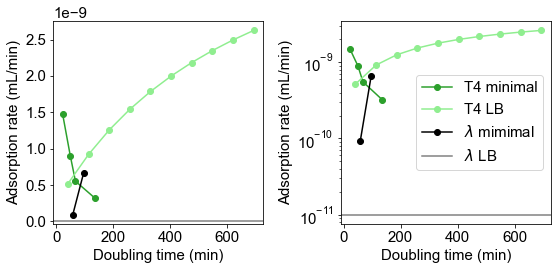

In [4]:
T4_tau = np.array([136,68,50,23]);

T4_LB_tau = np.linspace(60,1000,10);
T4_LB_k_ads = (5-4.75*1/(0.001*T4_LB_tau+1))*1e-9; 
T4_LB_B = 5400/T4_LB_tau; 
T4_LB_latent = 25.5 + 0.06*T4_LB_tau; 

lambda_tau = np.array([58.7, 96.9]);#glu,mal
lambda_k_ads = np.array([9.4e-11, 6.7e-10])

lambda_LB_k_ads = 1e-11;

fontSize=15
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
matplotlib.rcParams.update({"figure.figsize": (8,4)})

subplot(1,2,1)
plt.plot(T4_tau, T4_k_ads,'o-',color='tab:green', label='T4 minimal')
plt.plot(T4_LB_tau*np.log(2), T4_LB_k_ads,'o-',color='lightgreen', label='T4 LB')
plt.plot(lambda_tau, lambda_k_ads,'o-',color='k', label=r'$\lambda$ mimimal')
plt.axhline(y=lambda_LB_k_ads, color='grey', label=r'$\lambda$ LB')
plt.xlabel('Doubling time (min)')
plt.ylabel('Adsorption rate (mL/min)')
#plt.legend()

subplot(1,2,2)
plt.plot(T4_tau, T4_k_ads,'o-',color='tab:green', label='T4 minimal')
plt.plot(T4_LB_tau*np.log(2), T4_LB_k_ads,'o-',color='lightgreen', label='T4 LB')
plt.plot(lambda_tau, lambda_k_ads,'o-',color='k', label=r'$\lambda$ mimimal')
plt.axhline(y=lambda_LB_k_ads, color='grey', label=r'$\lambda$ LB')
plt.xlabel('Doubling time (min)')
plt.ylabel('Adsorption rate (mL/min)')
plt.legend()
plt.yscale('log')
#plt.axhline(y=1e)

plt.tight_layout()

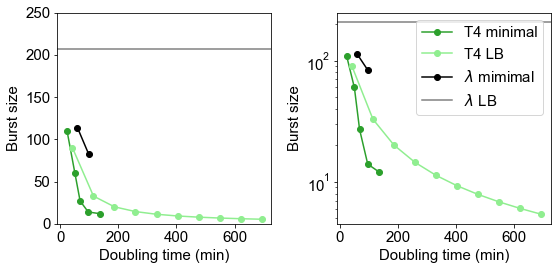

In [5]:
T4_tau = np.array([136,96,68,50,23]);
T4_B = np.array([12,14,27,60,110]);

lambda_B = np.array([114, 83]);
lambda_LB_B = 207;

fontSize=15
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
matplotlib.rcParams.update({"figure.figsize": (8,4)})

subplot(1,2,1)
plt.plot(T4_tau, T4_B,'o-',color='tab:green', label='T4 minimal')
plt.plot(T4_LB_tau*np.log(2), T4_LB_B,'o-',color='lightgreen', label='T4 LB')
plt.plot(lambda_tau, lambda_B,'o-',color='k', label=r'$\lambda$ mimimal')
plt.axhline(y=lambda_LB_B, color='grey', label=r'$\lambda$ LB')
plt.xlabel('Doubling time (min)')
plt.ylabel('Burst size')
#plt.legend()
plt.ylim((0,250))

subplot(1,2,2)
plt.plot(T4_tau, T4_B,'o-',color='tab:green', label='T4 minimal')
plt.plot(T4_LB_tau*np.log(2), T4_LB_B,'o-',color='lightgreen', label='T4 LB')
plt.plot(lambda_tau, lambda_B,'o-',color='k', label=r'$\lambda$ mimimal')
plt.axhline(y=lambda_LB_B, color='grey', label=r'$\lambda$ LB')
plt.xlabel('Doubling time (min)')
plt.ylabel('Burst size')
plt.legend()
plt.yscale('log')
#plt.axhline(y=1e)
#plt.ylim((1,500))

plt.tight_layout()

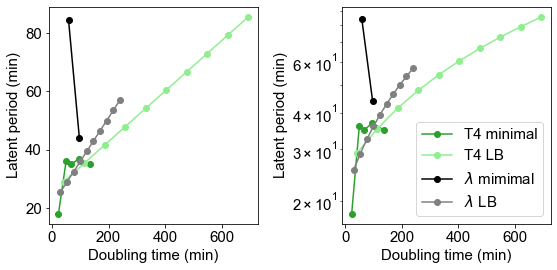

In [6]:
T4_tau = np.array([136,96,68,50,23]);
T4_latent = np.array([35,37,35,36,18]);

lambda_latent = np.array([84.5,44.1]);
lambda_LB_tau = np.linspace(30,240,10); 
lambda_LB_latent = 21+0.15*lambda_LB_tau;

fontSize=15
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
matplotlib.rcParams.update({"figure.figsize": (8,4)})

subplot(1,2,1)
plt.plot(T4_tau, T4_latent,'o-',color='tab:green', label='T4 minimal')
plt.plot(T4_LB_tau*np.log(2), T4_LB_latent,'o-',color='lightgreen', label='T4 LB')
plt.plot(lambda_tau, lambda_latent,'o-',color='k', label=r'$\lambda$ mimimal')
plt.plot(lambda_LB_tau, lambda_LB_latent, 'o-',color='grey', label=r'$\lambda$ LB')
plt.xlabel('Doubling time (min)')
plt.ylabel('Latent period (min)')
#plt.legend()
#plt.ylim((0,250))

subplot(1,2,2)
plt.plot(T4_tau, T4_latent,'o-',color='tab:green', label='T4 minimal')
plt.plot(T4_LB_tau*np.log(2), T4_LB_latent,'o-',color='lightgreen', label='T4 LB')
plt.plot(lambda_tau, lambda_latent,'o-',color='k', label=r'$\lambda$ mimimal')
plt.plot(lambda_LB_tau, lambda_LB_latent, 'o-',color='grey', label=r'$\lambda$ LB')
plt.xlabel('Doubling time (min)')
plt.ylabel('Latent period (min)')
plt.legend()
plt.yscale('log')
#plt.axhline(y=1e)
#plt.ylim((10,500))

plt.tight_layout()

In [7]:
T4_tau = np.array([136,68,50,23]);

T4_LB_tau = np.linspace(60,1000,10); #min
T4_LB_k_ads = (5-4.75*1/(0.001*T4_LB_tau+1))*1e-9; 
T4_LB_B = 5400/T4_LB_tau; 
T4_LB_latent = 25.5 + 0.06*T4_LB_tau; 

lambda_tau = np.array([58.7, 96.9]);#glu,mal
lambda_k_ads = np.array([9.4e-11, 6.7e-10])

lambda_LB_k_ads = 1e-11;

In [8]:
np.linspace(0,1,10)[1:]

array([0.11111111, 0.22222222, 0.33333333, 0.44444444, 0.55555556,
       0.66666667, 0.77777778, 0.88888889, 1.        ])

Text(0, 0.5, 'Adsorption constant (mL/min)')

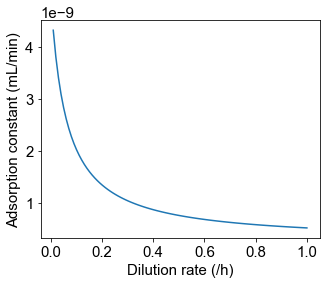

In [9]:
C_conc = 3e8; 

matplotlib.rcParams.update({"figure.figsize": (5,4)})

gr_LB = np.linspace(0,1,100)[1:]; #per hour, base e
T4_LB_tau = 1/gr_LB*60;  #min 
T4_LB_k_ads = (5-4.75*1/(0.001*T4_LB_tau+1))*1e-9;  #per min
T4_LB_B = 5400/T4_LB_tau; 
T4_LB_latent = 25.5 + 0.06*T4_LB_tau;  #per min
T4_LB_R = T4_LB_k_ads*C_conc*(T4_LB_B * np.exp(-gr_LB*T4_LB_latent/60) - 1);

plt.plot(gr_LB, T4_LB_k_ads)
plt.xlabel('Dilution rate (/h)')
plt.ylabel('Adsorption constant (mL/min)')

Text(0, 0.5, 'Burst size')

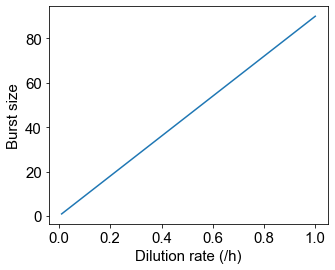

In [10]:
C_conc = 3e8; 

matplotlib.rcParams.update({"figure.figsize": (5,4)})

gr_LB = np.linspace(0,1,100)[1:]; #per hour, base e
T4_LB_tau = 1/gr_LB*60;  #min 
T4_LB_k_ads = (5-4.75*1/(0.001*T4_LB_tau+1))*1e-9;  #per min
T4_LB_B = 5400/T4_LB_tau; 
T4_LB_latent = 25.5 + 0.06*T4_LB_tau;  #per min
T4_LB_R = T4_LB_k_ads*C_conc*(T4_LB_B * np.exp(-gr_LB*T4_LB_latent/60) - 1);

plt.plot(gr_LB, T4_LB_B)
plt.xlabel('Dilution rate (/h)')
plt.ylabel('Burst size')

(0.0, 160.0)

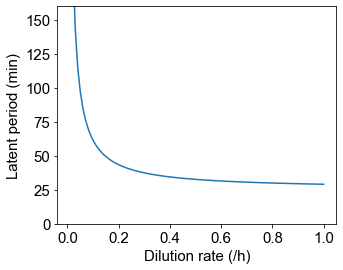

In [11]:
C_conc = 3e8; 

matplotlib.rcParams.update({"figure.figsize": (5,4)})

gr_LB = np.linspace(0,1,100)[1:]; #per hour, base e
T4_LB_tau = 1/gr_LB*60;  #min 
T4_LB_k_ads = (5-4.75*1/(0.001*T4_LB_tau+1))*1e-9;  #per min
T4_LB_B = 5400/T4_LB_tau; 
T4_LB_latent = 25.5 + 0.06*T4_LB_tau;  #per min
T4_LB_R = T4_LB_k_ads*C_conc*(T4_LB_B * np.exp(-gr_LB*T4_LB_latent/60) - 1);

plt.plot(gr_LB, T4_LB_latent)
plt.xlabel('Dilution rate (/h)')
plt.ylabel('Latent period (min)')
plt.ylim((0,160))

(0.0, 9.0)

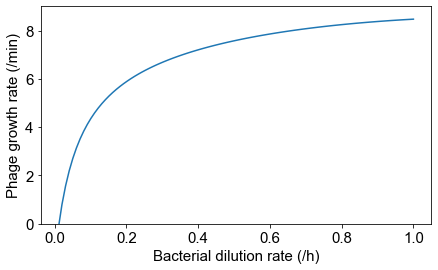

In [12]:
C_conc = 3e8; 

matplotlib.rcParams.update({"figure.figsize": (7,4)})

gr_LB = np.linspace(0,1,100)[1:]; #per hour, base e
T4_LB_tau = 1/gr_LB*60;  #min 
T4_LB_k_ads = (5-4.75*1/(0.001*T4_LB_tau+1))*1e-9;  #per min
T4_LB_B = 5400/T4_LB_tau; 
T4_LB_latent = 25.5 + 0.06*T4_LB_tau;  #per min
T4_LB_R = T4_LB_k_ads*C_conc*(T4_LB_B * np.exp(-gr_LB*T4_LB_latent/60) - 1);

plt.plot(gr_LB, T4_LB_R)
plt.xlabel('Bacterial dilution rate (/h)')
plt.ylabel('Phage growth rate (/min)')
plt.ylim((0,9))

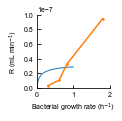

In [13]:
C_conc = 1; 

fontSize=7
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
matplotlib.rcParams.update({"figure.figsize": (1.7,1.7)})
marker_size_ = 1.5; 
line_width_ = 1; 

ax = plt.subplot(1,1,1)

gr_LB = np.linspace(0,1,100)[1:]; #per hour, base e
T4_LB_tau = 1/gr_LB*60;  #min 
T4_LB_k_ads = (5-4.75*1/(0.001*T4_LB_tau+1))*1e-9;  #per min
T4_LB_B = 5400/T4_LB_tau; 
T4_LB_latent = 25.5 + 0.06*T4_LB_tau;  #per min
T4_LB_R = T4_LB_k_ads*C_conc*(T4_LB_B * np.exp(-gr_LB*T4_LB_latent/60) - 0);


T4_tau = np.array([136,68,50,23]);
T4_gr = 1/T4_tau*60*np.log(2);   #per hour
N0 = 1e8; 
X = np.array([0.691,0.529,0.355,0.183]);
lnX = np.log10(X);
T4_k_ads = -lnX/N0/5; #per hour 
T4_B = np.array([12,27,60,110]); 
T4_latent = np.array([35,35,36,18]);  #per min
T4_R = T4_k_ads*C_conc*T4_B*np.exp(-T4_gr*T4_latent/60); 


plt.plot(gr_LB, T4_LB_R,linewidth=line_width_,label='Nabergoj et al.')
plt.plot(T4_gr, T4_R,'o-',markersize=marker_size_,label='Hadas et al.')
plt.xlabel('Bacterial growth rate (h$^{-1}$)')
plt.ylabel('R (mL min$^{-1}$)')
#plt.legend(frameon=False,loc='upper left')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")

plt.ylim((0,1e-7))
plt.xlim((0,2))
plt.tight_layout()

plt.savefig('../output/Sfig11.pdf', format='pdf', bbox_inches='tight')


In [15]:
import xlsxwriter

# Create a workbook and add a worksheet.
workbook = xlsxwriter.Workbook("../output/Sfig11.xlsx")
writer = pd.ExcelWriter("../output/Sfig11.xlsx", engine = 'xlsxwriter')


dftmptmp = pd.DataFrame({'Bacterial growth rate (per h)':gr_LB,\
                        'R (mL per min)':T4_LB_R})
dftmptmp = dftmptmp.T
dftmptmp.to_excel(writer, sheet_name = 'Nabergoj')   


dftmptmp = pd.DataFrame({'Bacterial growth rate (per h)':T4_gr,\
                        'R (mL per min)':T4_R})
dftmptmp = dftmptmp.T
dftmptmp.to_excel(writer, sheet_name = 'Hadas') 

writer.close()